In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dython.nominal import associations

from util import mutual_information

CSV_PATH = "weatherAUS.csv"
IMG_DIR = "img"

os.makedirs(IMG_DIR, exist_ok=True)

df = pd.read_csv(CSV_PATH)
df = df.drop(columns=["Date", "Location"])

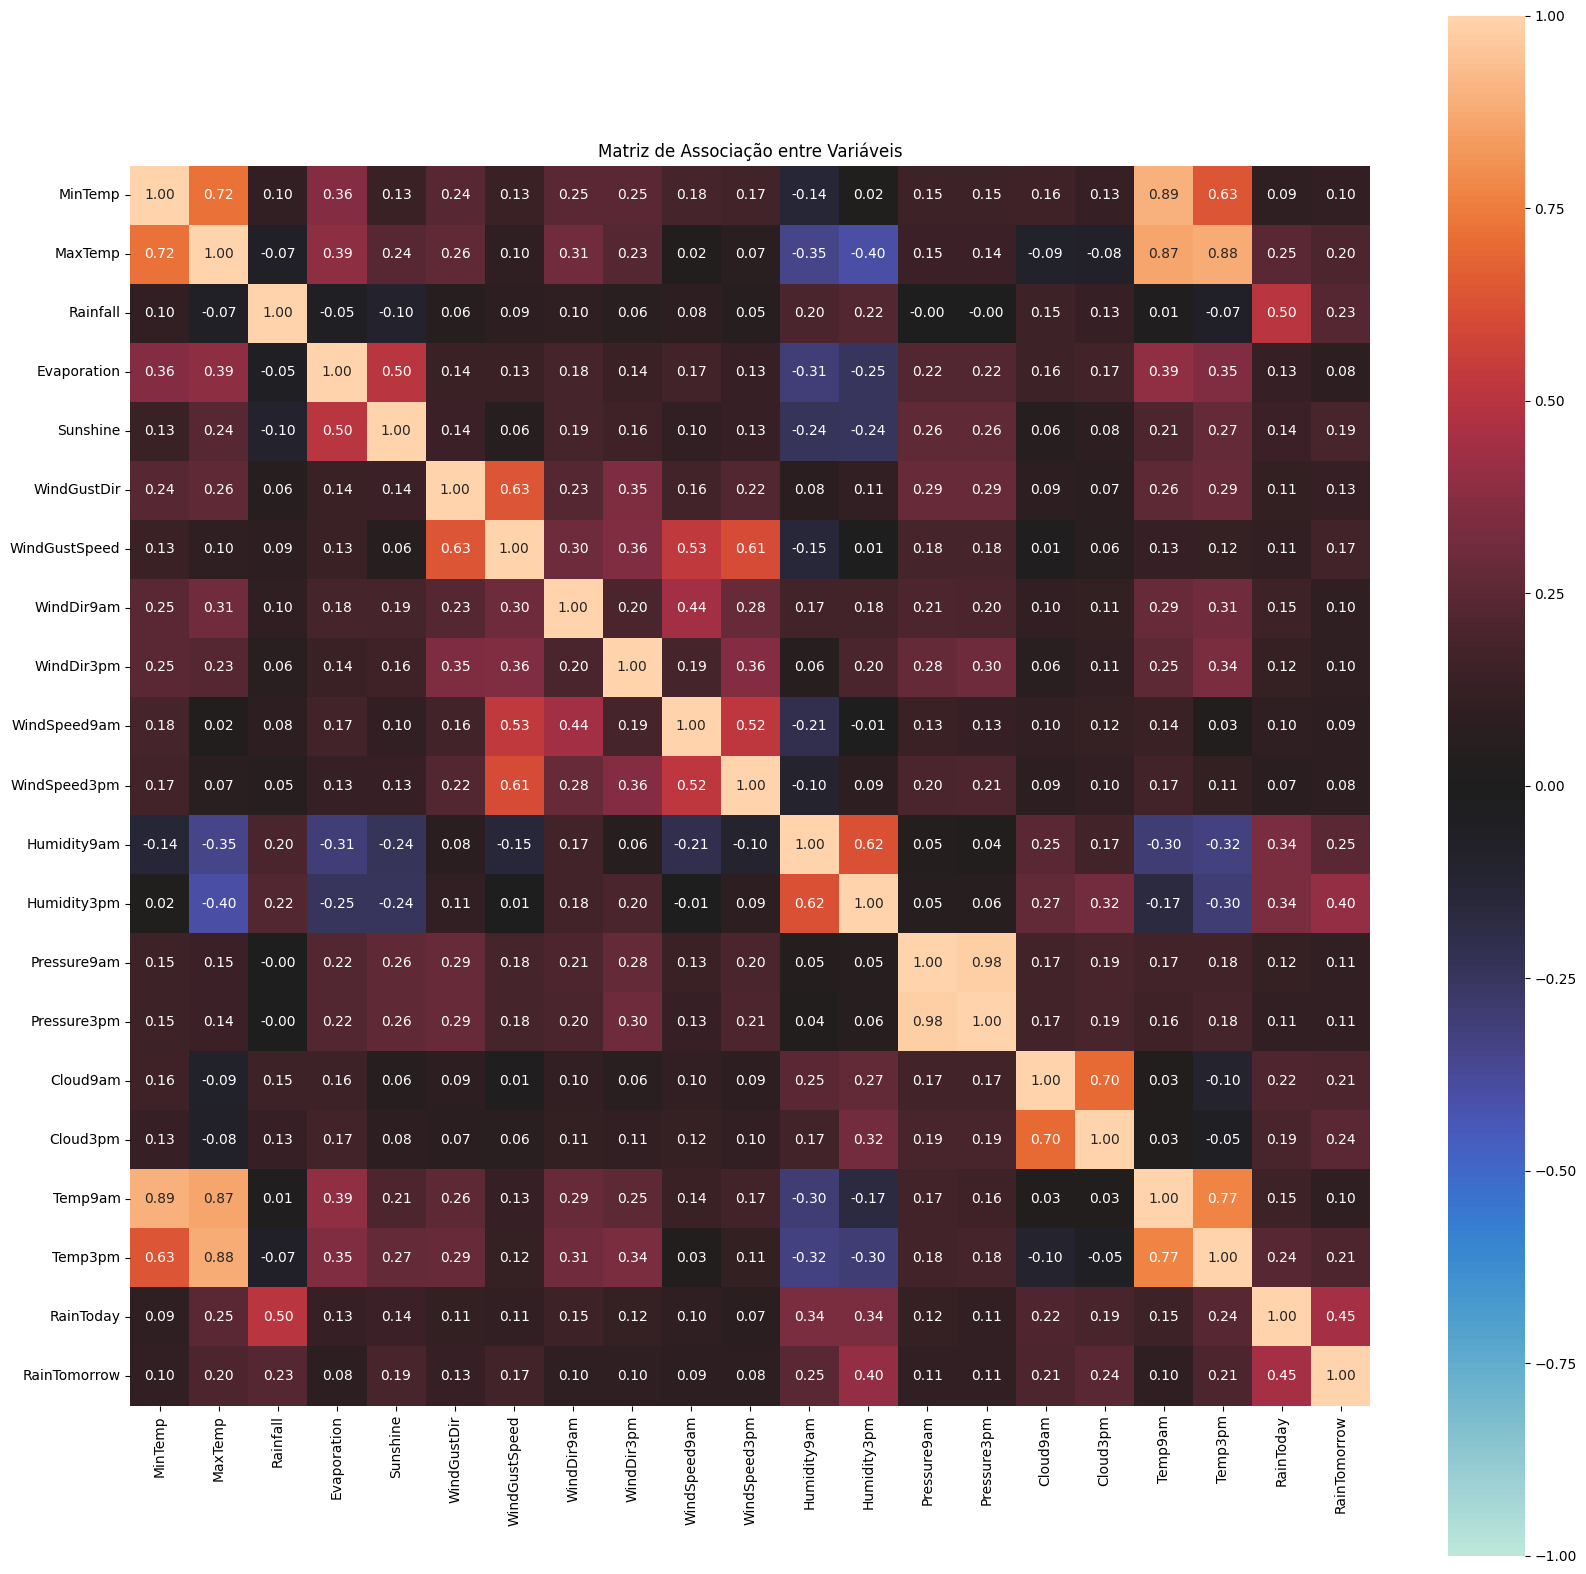

In [2]:
import matplotlib.pyplot as plt
from dython.nominal import associations

assoc = associations(
    df,
    nominal_columns="auto",
    numerical_columns=None,
    mark_columns=False,
    nom_nom_assoc="cramer",
    num_num_assoc="pearson",
    plot=True,
    figsize=(20, 20),
    title="Matriz de Associação entre Variáveis",
)

plt.show()
plt.close()

Valores Faltantes:
               Missing Values  Percentage
Sunshine                69835       48.01
Evaporation             62790       43.17
Cloud3pm                59358       40.81
Cloud9am                55888       38.42
Pressure9am             15065       10.36
Pressure3pm             15028       10.33
WindDir9am              10566        7.26
WindGustDir             10326        7.10
WindGustSpeed           10263        7.06
Humidity3pm              4507        3.10
WindDir3pm               4228        2.91
Temp3pm                  3609        2.48
RainTomorrow             3267        2.25
Rainfall                 3261        2.24
RainToday                3261        2.24
WindSpeed3pm             3062        2.11
Humidity9am              2654        1.82
WindSpeed9am             1767        1.21
Temp9am                  1767        1.21
MinTemp                  1485        1.02
MaxTemp                  1261        0.87


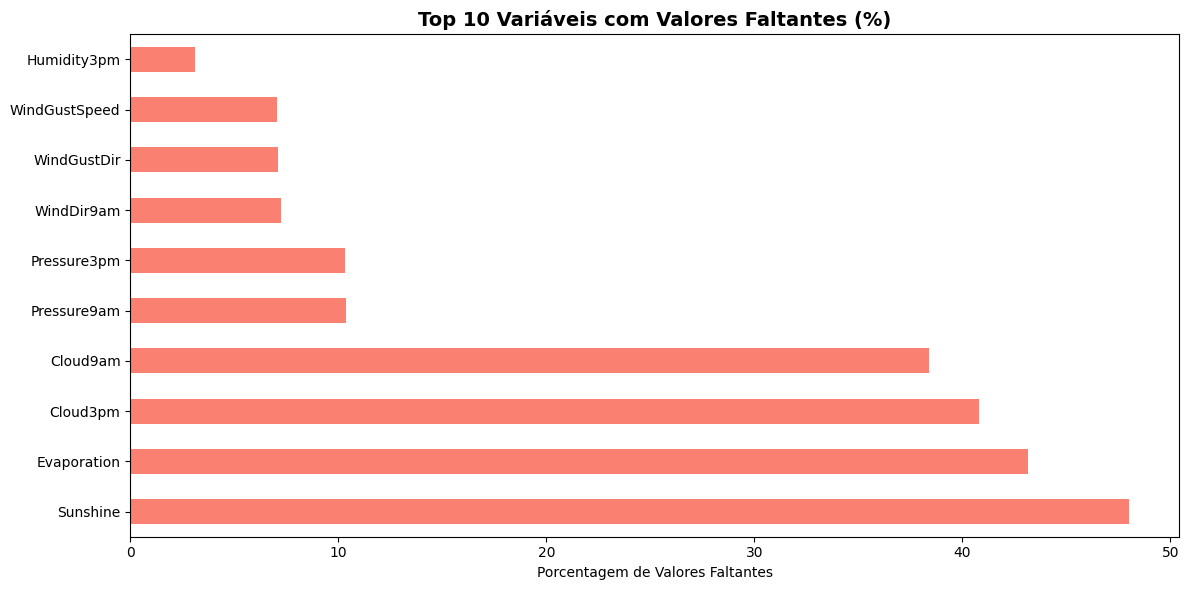

In [3]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df) * 100).round(2)

missing_df = pd.DataFrame(
    {"Missing Values": missing_values, "Percentage": missing_percent}
)

print("Valores Faltantes:")
print(missing_df[missing_df["Missing Values"] > 0])

# --------- GRÁFICO ---------
plt.figure(figsize=(12, 6))

(
    missing_df[missing_df["Missing Values"] > 0]
    .head(10)["Percentage"]
    .plot(kind="barh", color="salmon")
)

plt.title("Top 10 Variáveis com Valores Faltantes (%)", fontsize=14, fontweight="bold")
plt.xlabel("Porcentagem de Valores Faltantes")
plt.tight_layout()

plt.show()
plt.close()

In [4]:
def mi_vs_alvo(df: pd.DataFrame, target_col: str):
    """
    Calcula e imprime a Mutual Information de todas as variáveis em relação ao alvo.
    """
    vars_ = df.columns.to_list()
    if target_col in vars_:
        vars_.remove(target_col)

    for var in vars_:
        df_clean = df.dropna(subset=[var, target_col])
        mi = mutual_information(df_clean[var], df_clean[target_col])
        print(f"MI({var}, {target_col}) = {mi}")


print("\n=== Mutual Information com Cloud3pm ===")
mi_vs_alvo(df, "Cloud3pm")

print("\n=== Mutual Information com RainTomorrow ===")
mi_vs_alvo(df, "RainTomorrow")


=== Mutual Information com Cloud3pm ===
MI(MinTemp, Cloud3pm) = 0.006337775671749351
MI(MaxTemp, Cloud3pm) = 0.04199896197625308
MI(Rainfall, Cloud3pm) = 0.0581713993329618
MI(Evaporation, Cloud3pm) = 0.02269552861433842
MI(Sunshine, Cloud3pm) = 0.30309518225771365
MI(WindGustDir, Cloud3pm) = 0.015129410827129734
MI(WindGustSpeed, Cloud3pm) = 0.00825915261817342
MI(WindDir9am, Cloud3pm) = 0.015113443466656135
MI(WindDir3pm, Cloud3pm) = 0.0101919143853724
MI(WindSpeed9am, Cloud3pm) = 0.002414629570165275
MI(WindSpeed3pm, Cloud3pm) = 0.0026698053245033876
MI(Humidity9am, Cloud3pm) = 0.06870697056219854
MI(Humidity3pm, Cloud3pm) = 0.15535435438866813
MI(Pressure9am, Cloud3pm) = 0.016099291102192284
MI(Pressure3pm, Cloud3pm) = 0.009119946530055743
MI(Cloud9am, Cloud3pm) = 0.20419189462799275
MI(Temp9am, Cloud3pm) = 0.012506388637934105
MI(Temp3pm, Cloud3pm) = 0.05506973763430861
MI(RainToday, Cloud3pm) = 0.043558265983830474
MI(RainTomorrow, Cloud3pm) = 0.08585679804922414

=== Mutual Inf

In [5]:
# Estrutura da rede bayesiana baseada em MI e conhecimento prévio
edges = [
    # Primários
    ("Humidity3pm", "RainTomorrow"),
    ("Sunshine", "RainTomorrow"),
    ("Cloud3pm", "RainTomorrow"),
    ("Rainfall", "RainTomorrow"),
    ("Pressure9am", "RainTomorrow"),
    ("WindGustSpeed", "RainTomorrow"),
    # Secundários
    ("Humidity9am", "Humidity3pm"),
    ("Cloud9am", "Cloud3pm"),
    ("Pressure9am", "WindGustSpeed"),
    ("WindGustDir", "WindGustSpeed"),
]